In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../input/BES/interpreted_seismics_2/processed/"
geo_model = gp.create_model("v1_500m_not_scaled")

No module named 'osgeo'


In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[431215.754, 474015.754, 7785829.449, 7795029.449, -8000, -2000],
    resolution=[80, 80, 50],
    path_i=data_path + "sp_500m_not_scaled_500m_ajustado.csv",
    path_o=data_path + "op_top_mid_base_500m_not_scaled_500m_ajustado.csv",
)

Active grids: ['regular']


v1_500m_not_scaled  2024-03-15 13:57

In [3]:
geo_model.get_data()

X            Y        Z    smooth surface   
surface_points 0     431215.754  7785829.449 -2905.49  0.000002     top  \
               1     431515.754  7785829.449 -2925.77  0.000002     top   
               2     432015.754  7785829.449 -2965.06  0.000002     top   
               3     432515.754  7785829.449 -3004.24  0.000002     top   
               4     433015.754  7785829.449 -3043.23  0.000002     top   
...                         ...          ...      ...       ...     ...   
               5218  473515.754  7795029.449 -7050.33  0.000002    base   
               5219  474015.754  7795029.449 -7071.88  0.000002    base   
orientations   0     431215.754  7785829.450 -2905.49  0.010000     top   
               1     431215.754  7785829.450 -4051.43  0.010000     mid   
               2     431215.754  7785829.450 -5197.37  0.010000    base   

                              G_x           G_y  G_z  
surface_points 0              NaN           NaN  NaN  
               1              NaN           NaN  NaN  
               2              NaN           NaN  NaN  
               3              NaN           NaN  NaN  
               4              NaN           NaN  NaN  
...                           ...           ...  ...  
               5218           NaN           NaN  NaN  
               5219           NaN           NaN  NaN  
orientations   0     1.000000e-12  1.000000e-12  1.0  
               1     1.000000e-12  1.000000e-12  1.0  
               2     1.000000e-12  1.000000e-12  1.0  

[5223 rows x 8 columns]

In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat": ("top"),
        "Strat": ("mid"),
        "Strat": ("base"),
        "Basement": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,top,Default series,1,#015482,1
1,mid,Default series,2,#9f0052,2
2,base,Strat,1,#ffbe00,3
3,basement,Basement,1,#728f02,4


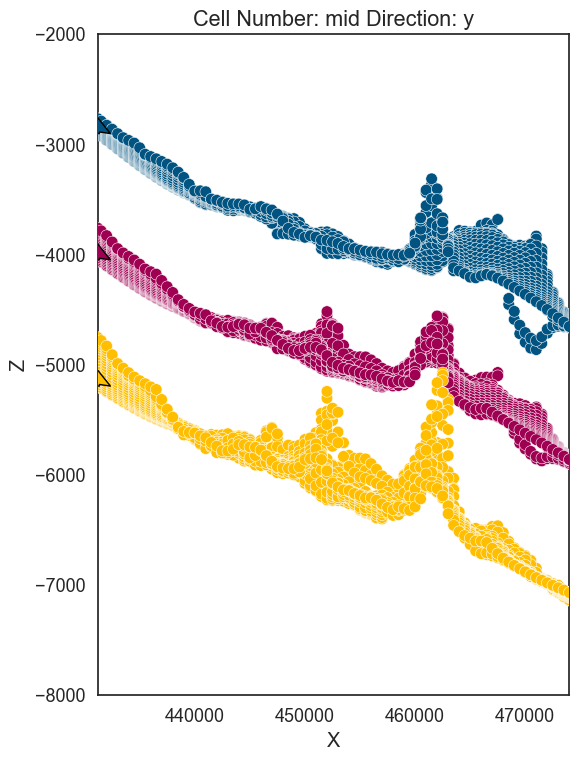

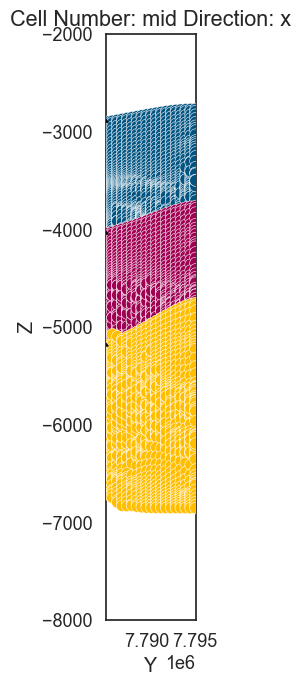

In [5]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=False
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    show_data=True,
    ve=5,
)

In [6]:
%%time
# Interpolating and computing the model
gp.set_interpolator(
    geo_model,
    output=["geology"],
    compile_theano=True,
    theano_optimizer="fast_compile",  # fast_compile, fast_run
    dtype="float64",  # for model stability
)

sol = gp.compute_model(geo_model, compute_mesh=False)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range                44186.87588
$C_o$            46487619.047619
drift equations        [3, 3, 3]
CPU times: total: 17min 49s
Wall time: 6min 18s


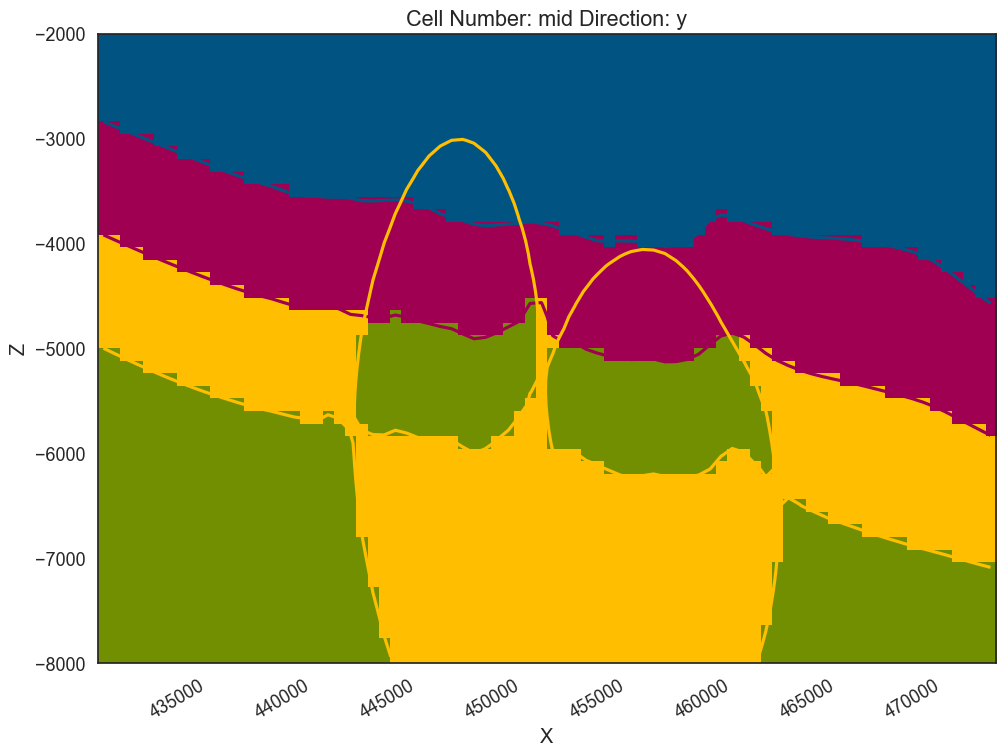

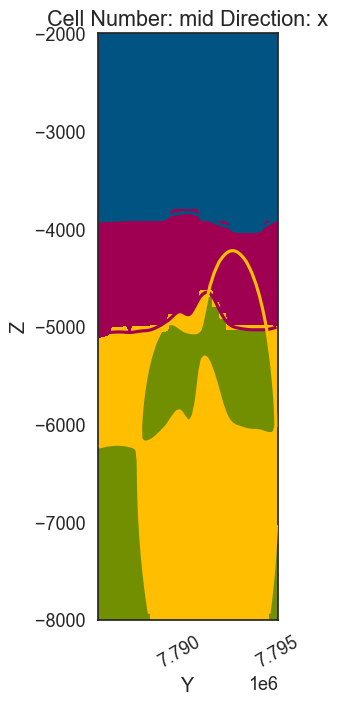

In [7]:
# Ploting 2D and 3D

# Seção transversal do modelo
gp.plot_2d(geo_model,direction="y",show_data=False,show_lith=True,ve=5)
gp.plot_2d(geo_model,direction="x",show_data=False,show_lith=True,ve=5,legend=True)

In [8]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [ ]:
geo_model.solutions

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=False,
    solution=True,
)